In [1]:
from graphviz import Digraph

In [2]:
def find_nodes_edges(ll):
    nodes,edges = set(),set()
    current = ll.head
    while current != None:
        nodes.add(current)
        edges.add((current,current.next))
        current = current.next
    return nodes,edges
def draw_graph(ll,format='SVG',rankdir='LR'):
    nodes,edges = find_nodes_edges(ll)
    dot = Digraph(name='linked_list',format=format,graph_attr={'rankdir':rankdir})
    for n in nodes:
        dot.node(str(id(n)),label=str(n.data),shape='record')
    for n1,n2 in edges:
        dot.edge(str(id(n1)),str(id(n2)))
    dot.render(directory='../images/').replace('\\', '/')
    return dot

In [3]:
class Node:
    def __init__(self,data):
        self.data = data
        self.next = None
    
    def __repr__(self):
        return f"Node({self.data})"
    
class LinkedList:
    def __init__(self,value):
        self.length = 0
        self.head = None
        self.tail = None
        self.insert(value)
    
    def __repr__(self):
        out = ""
        current = self.head
        while current != None:
            out += str(current.data)
            out += ' -> '
            current = current.next
        return out
    
    def find_node(self,value):
        current = self.head
        index = 0
        while current:
            if current.data == value:
                return index
            current = current.next
            index += 1
        return False
    
    def get(self,index):
        if index < 0 or index > self.length:
            raise ValueError('Index out of bounds')
        current = self.head
        for _ in range(index):
            current = current.next
        return current
    
    def set(self,index,data):
        temp = self.get(index)
        if temp:
            temp.data = data
            return True
        return False

    def pop(self):
        to_pop = self.tail
        if self.length == 0:
            raise Exception("No elements in the List")
        elif self.length == 1:
            self.head = None
            self.tail = None
            self.length -= 1
        else:
            current = self.head
            while current:
                if current.next == self.tail:
                    self.tail = current
                    current.next = None
                    self.length -= 1
                current = current.next
        return to_pop
    
    def remove(self,index):
        temp = self.get(index-1)
        to_remove = temp.next
        temp.next = to_remove.next
        self.length -= 1
        return True
    
    def delete_list(self):
        self.head = None
        self.tail = None
        self.length = 0

    def insert(self,data,loc='end'):
        if not isinstance(loc,(str,int)): 
            raise ValueError('Invalid Location Type')
        if isinstance(loc,str) and loc not in ['begining','end']: 
            raise ValueError('Invalid Location Value')
        if isinstance(loc,int) and loc < 0: 
            raise ValueError('Location should be non-negative Integer')
        
        new_node = Node(data)
        if self.length == 0:
            self.head = new_node
            self.tail = new_node
        elif loc == 'begining' or loc == 0:
            new_node.next = self.head
            self.head = new_node
        elif loc == 'end' or loc >= self.length:
            tail = self.tail
            tail.next = new_node
            self.tail = new_node
        else:
            current = self.head
            for _ in range(loc-1):
                current = current.next
            new_node.next = current.next
            current.next = new_node
        self.length += 1

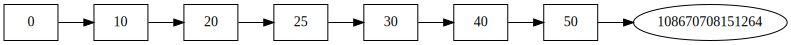

In [4]:
list1 = LinkedList(0)
list1.insert(10)
list1.insert(20)
list1.insert(30)
list1.insert(40)
list1.insert(50)
list1.insert(25,loc=3)

draw_graph(list1)
